<a href="https://colab.research.google.com/github/gol-d-inesh/Water_quality_classification/blob/main/Water_quality_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [16]:
# 2. LOAD DATA
from google.colab import files
uploaded = files.upload()

Saving RAW-NWMP_August2025_MPCB_0.xlsx to RAW-NWMP_August2025_MPCB_0 (1).xlsx


In [17]:
file_path = "RAW-NWMP_August2025_MPCB_0 (1).xlsx"
df = pd.read_excel(file_path)

print("Dataset Shape:", df.shape)
print('\n')
print(df.head())

Dataset Shape: (222, 54)


   STN Code Sampling Date Month Sampling Time  \
0      1312    2025-05-08   Aug      16:30:00   
1      2158    2025-05-08   Aug      16:00:00   
2      2159    2025-05-08   Aug      17:15:00   
3      2160    2025-05-08   Aug      15:00:00   
4      2161    2025-04-08   Aug      15:30:00   

                                            Stn Name Type Water Body  \
0  Godavari river at Jaikwadi Dam, Village. Paith...           River   
1  Godavari river at U/s of Paithan at Paithan in...           River   
2  Godavari river at D/s of Paithan at Pathegaon ...           River   
3  Godavari river at U/s of Aurangabad Reservoir,...           River   
4  Godavari river at Jalna Intake water pump hous...           River   

  Name Of Water Body River Basin            District   State Name  ...  \
0           Godavari    Godavari  Ch. Sambhaji Nagar  Maharashtra  ...   
1           Godavari    Godavari  Ch. Sambhaji Nagar  Maharashtra  ...   
2           Godavari   

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   STN Code                        222 non-null    int64         
 1   Sampling Date                   222 non-null    datetime64[ns]
 2   Month                           222 non-null    object        
 3   Sampling Time                   222 non-null    object        
 4   Stn Name                        222 non-null    object        
 5   Type Water Body                 222 non-null    object        
 6   Name Of Water Body              200 non-null    object        
 7   River Basin                     198 non-null    object        
 8   District                        222 non-null    object        
 9   State Name                      222 non-null    object        
 10  Mon Agency                      222 non-null    object        
 11  Freque

In [19]:
#Missing values
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
Use of Water in Down Stream,222
Remark,215
Odor,170
Visibility Effluent Discharge,94
Major Polluting Sources,73
Fecal Streptococci,48
Boron,34
Temperature,29
River Basin,24
Name Of Water Body,22


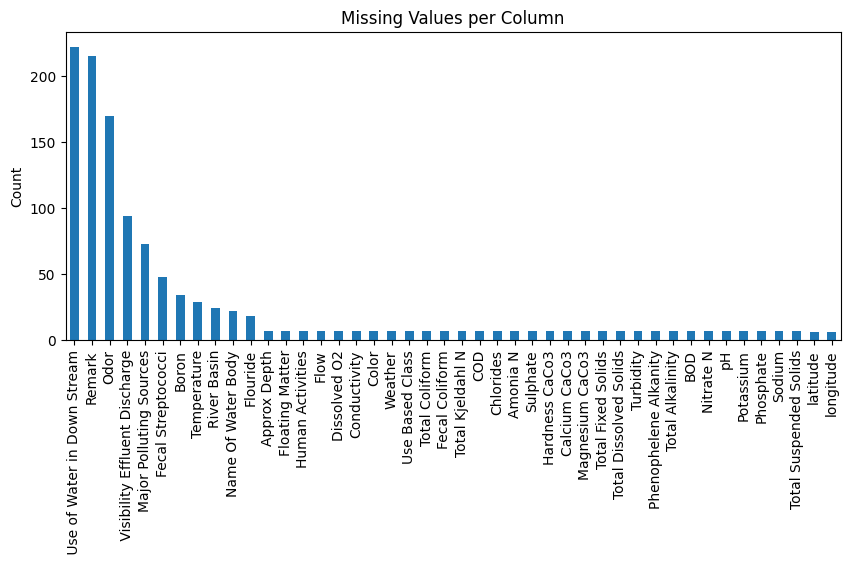

In [20]:
#Visualization for missing values

plt.figure(figsize=(10,4))
missing[missing > 0].plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()

In [21]:
#Target Variable Analysis

df["Use Based Class"].value_counts()


,count
Use Based Class,
A (Drinking Water source without conventional treatment but after disinfection),141
No Information,44
"E (Irrigation, industrial cooling and controlled waste)",19
C (Drinking water source),6
B (Outdoor bathing(Organized)),5


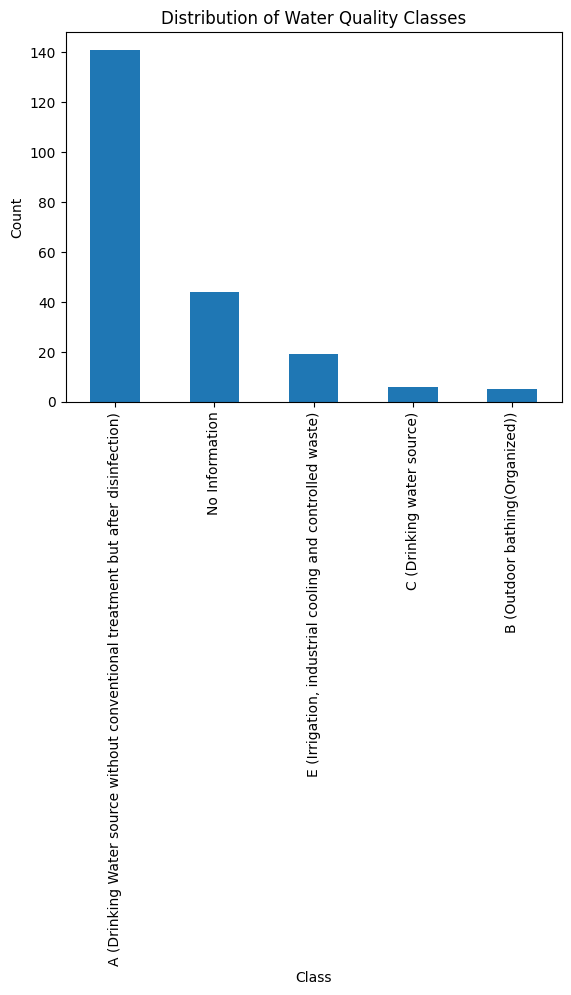

In [22]:
df["Use Based Class"].value_counts().plot(kind="bar")
plt.title("Distribution of Water Quality Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [23]:
#Statistical Summary of Numeric Features

df.describe()

,STN Code,Sampling Date,Use of Water in Down Stream,Flow,Temperature,pH,Conductivity,BOD,COD,Amonia N,Hardness CaCo3,Calcium CaCo3,Magnesium CaCo3,Total Dissolved Solids,Total Fixed Solids
count,222.000000,222,0.0,215.000000,193.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,2615.716216,2025-05-20 21:50:16.216216320,NaN,0.326512,25.963731,7.900465,4601.869767,9.106512,43.056279,1.051628,597.605581,149.728372,447.691116,3651.939535,3217.614884
min,11.000000,2025-03-08 00:00:00,NaN,0.000000,18.000000,6.900000,45.000000,1.800000,8.000000,0.400000,16.000000,8.000000,8.000000,36.000000,30.000000
25%,2162.250000,2025-04-08 00:00:00,NaN,0.000000,24.000000,7.600000,224.000000,3.200000,12.000000,0.400000,70.000000,40.000000,32.000000,173.000000,151.000000
50%,2668.500000,2025-05-08 00:00:00,NaN,0.000000,27.000000,7.900000,421.000000,4.200000,20.000000,0.400000,130.000000,66.000000,60.000000,316.000000,265.000000
75%,2767.250000,2025-06-08 00:00:00,NaN,0.000000,28.000000,8.200000,820.000000,8.600000,34.050000,0.690000,235.700000,130.400000,105.000000,526.000000,454.000000
max,5997.000000,2025-11-08 00:00:00,NaN,8.000000,31.000000,9.700000,74240.000000,210.000000,624.000000,16.920000,7390.000000,1160.000000,6230.000000,38400.000000,34560.000000
std,1274.980701,NaN,NaN,1.058607,3.006717,0.438721,11045.712262,17.544468,67.590407,1.960582,1295.815299,217.426974,1084.977965,8778.601406,7763.467270


##Cleaning Process

In [50]:
df.shape

(222, 54)

In [56]:
# 7 rows are having complete none values, so dropinng it

df=df.dropna(subset=["Use Based Class"])

In [57]:
df

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,...,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,2025-05-08,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,2025-05-08,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,489.0,441.0,11,0.71,0.61,3.14,0.41,NaN,19°30.887’,75°22.457’
2,2159,2025-05-08,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,491.0,442.0,11,0.76,0.56,3.16,0.45,NaN,19°28.835’,75°23.835’
3,2160,2025-05-08,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,479.0,612.0,10(BDL),1.47,0.55,3.13,0.6,NaN,19°37.463’,75°01.490’
4,2161,2025-04-08,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,...,765.0,689.0,12,0.33,0.56,4.57,0.49,NaN,19°21.392’,75°42.870’
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,1911,2025-07-08,Aug,12:25:00,"Chandrabhaga river at U/s of Pandharpur town, ...",River,Chandrabhaga,Chandrabhaga,Solapur,Maharashtra,...,648.0,530.0,11,0.22,0.5(BDL),1.99,0.2(BDL),NaN,17°43.797',75°18.745'
218,1912,2025-07-08,Aug,11:30:00,Chandrabhaga river at D/s of Pandharpur town r...,River,Chandrabhaga,Chandrabhaga,Solapur,Maharashtra,...,624.0,510.0,16,0.93,0.5(BDL),1.16,0.7,NaN,17°40.086',75°20.839'
219,2705,2025-08-08,Aug,10:15:00,"Sina river near Laboti toll naka, Village. Lab...",River,Sina,Sina,Solapur,Maharashtra,...,448.0,361.0,70,0.32,1.1,1(BDL),0.4,NaN,17° 47.095’,75° 42.577’
220,2789,2025-07-08,Aug,13:35:00,"Nalla at D/s of Aklai Mandir, Village. Aklai, ...",Nala,Nira,Nira,Solapur,Maharashtra,...,465.0,374.0,24,0.73,0.5(BDL),4.45,0.3,NaN,17° 53.339’,75° 01.541’


In [60]:
#In the target variable there is a class which was not categorized as mentioned as No Information, removing all the data to get better evaluation at the modeling.

df_non = df[df["Use Based Class"]=="No Information"]
df_non

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,...,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
13,1153,2025-04-08,Aug,04:55:00,"Krishna river at Rajapur Weir, Village. Rajapu...",River,Krishna,Krishna,Kolhapur,Maharashtra,...,129.0,116.0,11,0.2(BDL),NaN,1(BDL),0.25,NaN,16°37.717 ’,74°39.893’
14,1310,2025-04-08,Aug,05:30:00,Krishna river at Kurundwad near Santaji Ghorpa...,River,Krishna,Krishna,Kolhapur,Maharashtra,...,128.0,115.0,11,0.2(BDL),NaN,1(BDL),0.2(BDL),NaN,16°41.276’,74°36.055’
15,1904,2025-04-08,Aug,11:45:00,Panchaganga river at U/s of Kolhapur town near...,River,Panchganga,Panchganga,Kolhapur,Maharashtra,...,76.0,68.0,10(BDL),0.2(BDL),NaN,1(BDL),0.27,NaN,16°41.553',74°09.973'
16,1905,2025-04-08,Aug,07:40:00,Panchaganga river at D/s of Kolhapur town at G...,River,Panchganga,Panchganga,Kolhapur,Maharashtra,...,104.0,94.0,12,0.2(BDL),NaN,1(BDL),0.2(BDL),NaN,16°42.697',74°16.822'
17,2163,2025-04-08,Aug,06:05:00,Panchaganga river at Shirol near Shirol Intake...,River,Panchganga,Panchganga,Kolhapur,Maharashtra,...,118.0,106.0,12,0.2(BDL),NaN,1(BDL),0.36,NaN,16º43.313',74º35.672'
18,1311,2025-04-08,Aug,04:05:00,Panchaganga river at Ichalkaranji near MIDC i...,River,Panchganga,Panchganga,Kolhapur,Maharashtra,...,112.0,101.0,12,0.2(BDL),NaN,1(BDL),0.22,NaN,16°39.950’,74°28.495’
19,5986,2025-04-08,Aug,11:05:00,"Bhogawati River water sample at Haldi KT Weir,...",River,NaN,NaN,Kolhapur,Maharashtra,...,78.0,70.0,10(BDL),0.2(BDL),NaN,1(BDL),0.32,NaN,16.5833,74.15
20,5987,2025-04-08,Aug,05:45:00,"Panchaganga River, Terwad bandhara, Dist- Kolh...",River,NaN,NaN,Kolhapur,Maharashtra,...,114.0,103.0,12,0.2(BDL),NaN,1(BDL),0.44,NaN,16.67253,74.572223
34,2790,2025-04-08,Aug,12:20:00,Pimpal.Paneri nalla at Ratnagiri near Finolex ...,Nala,Pimpal Paneri,Pimpal Paneri,Ratnagiri,Maharashtra,...,178.0,160.0,11,0.2(BDL),NaN,1.12,0.42,NaN,16° 55.175’,73° 17.944’
42,2165,2025-07-08,Aug,12:00:00,"Sea water at Gateway of India, Village. Colaba...",Sea,Gate Way of India,Gate Way of India,Mumbai,Maharashtra,...,30310.0,26673.0,48,0.24,1.48,99.3,0.57,NaN,18°55.348’,72°50.081’


In [61]:
df = df[df["Use Based Class"]!="No Information"]

In [62]:
df

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,...,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,2025-05-08,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,497.0,448.0,10(BDL),0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,2025-05-08,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,489.0,441.0,11,0.71,0.61,3.14,0.41,NaN,19°30.887’,75°22.457’
2,2159,2025-05-08,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,491.0,442.0,11,0.76,0.56,3.16,0.45,NaN,19°28.835’,75°23.835’
3,2160,2025-05-08,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,479.0,612.0,10(BDL),1.47,0.55,3.13,0.6,NaN,19°37.463’,75°01.490’
4,2161,2025-04-08,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,...,765.0,689.0,12,0.33,0.56,4.57,0.49,NaN,19°21.392’,75°42.870’
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1188,2025-07-08,Aug,14:15:00,Bhima river at Narsingpur near Sangam bridge ...,River,Bhima,Bhima,Solapur,Maharashtra,...,483.0,392.0,13,0.51,1,1(BDL),0.2(BDL),NaN,17° 30’,75° 30’
217,1911,2025-07-08,Aug,12:25:00,"Chandrabhaga river at U/s of Pandharpur town, ...",River,Chandrabhaga,Chandrabhaga,Solapur,Maharashtra,...,648.0,530.0,11,0.22,0.5(BDL),1.99,0.2(BDL),NaN,17°43.797',75°18.745'
218,1912,2025-07-08,Aug,11:30:00,Chandrabhaga river at D/s of Pandharpur town r...,River,Chandrabhaga,Chandrabhaga,Solapur,Maharashtra,...,624.0,510.0,16,0.93,0.5(BDL),1.16,0.7,NaN,17°40.086',75°20.839'
220,2789,2025-07-08,Aug,13:35:00,"Nalla at D/s of Aklai Mandir, Village. Aklai, ...",Nala,Nira,Nira,Solapur,Maharashtra,...,465.0,374.0,24,0.73,0.5(BDL),4.45,0.3,NaN,17° 53.339’,75° 01.541’


In [63]:
dnum=df = df.replace(r"\(BDL\)", "", regex=True)

/tmp/ipython-input-553288791.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dnum=df = df.replace(r"\(BDL\)", "", regex=True)


In [65]:
dnum.head()

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,...,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,2025-05-08,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,497.0,448.0,10,0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,2025-05-08,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,489.0,441.0,11,0.71,0.61,3.14,0.41,NaN,19°30.887’,75°22.457’
2,2159,2025-05-08,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,491.0,442.0,11,0.76,0.56,3.16,0.45,NaN,19°28.835’,75°23.835’
3,2160,2025-05-08,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,...,479.0,612.0,10,1.47,0.55,3.13,0.6,NaN,19°37.463’,75°01.490’
4,2161,2025-04-08,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,...,765.0,689.0,12,0.33,0.56,4.57,0.49,NaN,19°21.392’,75°42.870’


In [67]:
dnum.astype(str).apply(lambda x: x.str.contains("ND")).sum()

,0
STN Code,0
Sampling Date,0
Month,0
Sampling Time,0
Stn Name,0
Type Water Body,0
Name Of Water Body,0
River Basin,0
District,0
State Name,0


In [68]:
#In one of the Nitrate column 'ND' is presented and going to replace it with the median

dnum['Nitrate N']=dnum["Nitrate N"].replace("ND", np.nan)

In [69]:
dnum.astype(str).apply(lambda x: x.str.contains("ND")).sum()

,0
STN Code,0
Sampling Date,0
Month,0
Sampling Time,0
Stn Name,0
Type Water Body,0
Name Of Water Body,0
River Basin,0
District,0
State Name,0


In [72]:
dnum["Nitrate N"] = pd.to_numeric(dnum["Nitrate N"], errors="coerce")
median_value = dnum["Nitrate N"].median()
dnum["Nitrate N"].fillna(median_value, inplace=True)

/tmp/ipython-input-1848291742.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dnum["Nitrate N"].fillna(median_value, inplace=True)


In [73]:
dnum.astype(str).apply(lambda x: x.str.contains("ND")).sum()

,0
STN Code,0
Sampling Date,0
Month,0
Sampling Time,0
Stn Name,0
Type Water Body,0
Name Of Water Body,0
River Basin,0
District,0
State Name,0


In [74]:
#Selecting required column which is used to classify the water

selected_cols = ['pH','Dissolved O2','BOD','COD','Total Coliform','Fecal Coliform','Nitrate N','Total Dissolved Solids','Conductivity','Turbidity','Temperature']

X = dnum[selected_cols]
y = dnum["Use Based Class"]

In [76]:
#Checking both X and y

print("\nFinal Feature Count:", X.shape[1])
print(X.columns)
print("\nTarget Distribution:")
print(y.value_counts())


Final Feature Count: 11
Index(['pH', 'Dissolved O2', 'BOD', 'COD', 'Total Coliform', 'Fecal Coliform',
       'Nitrate N', 'Total Dissolved Solids', 'Conductivity', 'Turbidity',
       'Temperature'],
      dtype='object')

Target Distribution:
Use Based Class
A (Drinking Water source without conventional treatment but after disinfection)    141
E (Irrigation, industrial cooling and controlled waste)                             19
C (Drinking water source)                                                            6
B (Outdoor bathing(Organized))                                                       5
Name: count, dtype: int64


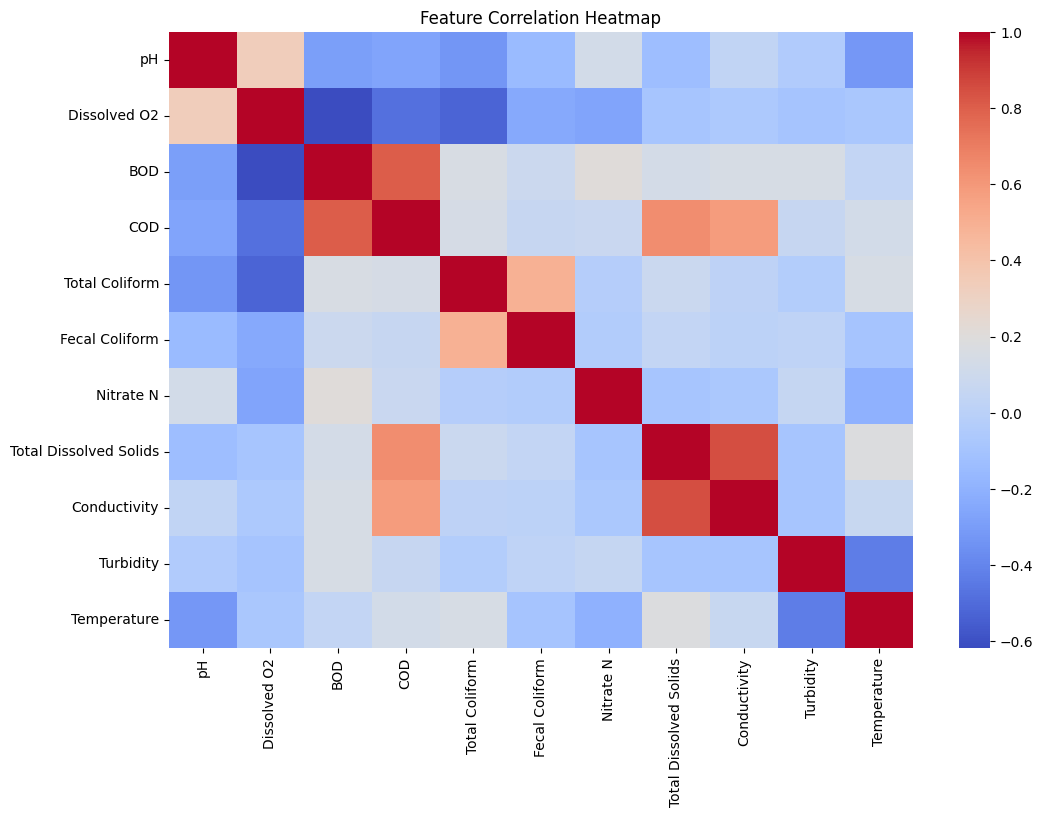

In [77]:
#CORRELATION HEATMAP

plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [81]:
X.isna().sum()

,0
pH,0
Dissolved O2,0
BOD,0
COD,0
Total Coliform,0
Fecal Coliform,0
Nitrate N,0
Total Dissolved Solids,0
Conductivity,0
Turbidity,0


In [82]:
X["Temperature"].fillna(X["Temperature"].median(), inplace=True)

/tmp/ipython-input-2075263177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Temperature"].fillna(X["Temperature"].median(), inplace=True)
/tmp/ipython-input-2075263177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Temperature"].fillna(X["Temperature"].median(), inplace=True)


In [83]:
#TRAIN TEST SPLIT

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)

In [92]:
#MODEL 1 — LOGISTIC REGRESSION

lr = Pipeline([
    ("scaler",StandardScaler()),
    ("model",LogisticRegression(max_iter=1000))
])

lr.fit(X_train,y_train)

print("Logistic:", cross_val_score(lr,X,y,cv=5).mean())


Logistic: 0.7658823529411765


In [96]:
#Hyper Parameter Tuning

log_model = LogisticRegression(max_iter=500)

log_params = {
    "C": [0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}

grid_log = GridSearchCV(
    log_model,
    log_params,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_log.fit(X_train, y_train)

best_log = grid_log.best_estimator_
print(grid_log.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [93]:
# 9. MODEL 2 — RANDOM FOREST

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train,y_train)
print("RandomForest:", cross_val_score(rf,X,y,cv=5).mean())

RandomForest: 0.8067226890756303


In [98]:
rf_model = RandomForestClassifier(random_state=42)

rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(
    rf_model,
    rf_params,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [99]:
best_rf = grid_rf.best_estimator_
print(grid_rf.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [101]:
#EVALUATION FUNCTION

def evaluate(model,name):
    pred = model.predict(X_test)
    print("\n=========================")
    print("MODEL:",name)
    print("=========================")

    print("\nClassification Report")
    print(classification_report(y_test,pred))

    print("\nConfusion Matrix")
    print(confusion_matrix(y_test,pred))

evaluate(best_log,"Logistic Regression")
evaluate(best_rf,"Random Forest")


MODEL: Logistic Regression

Classification Report
                                                                                 precision    recall  f1-score   support

A (Drinking Water source without conventional treatment but after disinfection)       0.88      1.00      0.94        29
                                                 B (Outdoor bathing(Organized))       1.00      1.00      1.00         1
                                                      C (Drinking water source)       0.00      0.00      0.00         1
                        E (Irrigation, industrial cooling and controlled waste)       1.00      0.25      0.40         4

                                                                       accuracy                           0.89        35
                                                                      macro avg       0.72      0.56      0.58        35
                                                                   weighted avg       0.87      0.89

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [102]:
#CROSS VALIDATION SCORE

print("Logistic Score:", best_log.score(X_test, y_test))
print("RandomForest Score:", best_rf.score(X_test, y_test))

Logistic Score: 0.8857142857142857
RandomForest Score: 0.8285714285714286


In [103]:
#SAVE BEST MODEL

best_model = best_log
joblib.dump(best_model,"water_quality_model.pkl")

print("\nModel saved as water_quality_model.pkl")


Model saved as water_quality_model.pkl


In [105]:
#TEST LOADED MODEL

loaded_model = joblib.load("water_quality_model.pkl")
print("\nSample Prediction:", loaded_model.predict(X_test))


Sample Prediction: ['A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after disinfection)'
 'A (Drinking Water source without conventional treatment but after